# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#cons">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this analysis, we’re using the TMDb movie dataset, which contains information on 10,000 movies. The dataset consists of two files:
1. `tmdb_5000_movies.csv`: This file includes detailed information about movies, such as:

- id
- title
- genres
- release_date
- budget
- revenue
- popularity
- vote_average
- vote_count
- runtime
- production_companies
- production_counties
- original_language

2. `tmdb_5000_credits.csv`: This file contains cast and crew information for the movies, with columns:

- movie_id
- title
- cast
- crew

Relationship between Tables: Both tables can be joined using the movie ID or title, allowing us to combine information from both tables for analysis.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

pd.options.display.float_format = '{:,.0f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [24]:
# Load credits and movies data
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')


#### Display the first few rows, size, data types of each DataFrame

In [25]:
# Display the first few rows of each DataFrame
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
# Display the first few rows of each DataFrame
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",44,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124


In [27]:
# Inspect size, data types of each column
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [28]:
# Inspect size, data types of each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Handle Duplicates

In [29]:
# Check for duplicates of movie dataset
movies.duplicated(subset='id').sum()

np.int64(0)

In [30]:
# Check for duplicates of credit dataset
credits.duplicated(subset='movie_id').sum()

np.int64(0)

So, there is no duplicate data in movies and credits dataset.

#### Handle Missing Values

In [31]:
# Find percentage of null values of movie dataset
movies.isnull().sum()/len(movies)*100

budget                  0
genres                  0
homepage               64
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                18
title                   0
vote_average            0
vote_count              0
dtype: float64

In [32]:
# Find percentage of null values of credit dataset
credits.isnull().sum()/len(credits)*100

movie_id   0
title      0
cast       0
crew       0
dtype: float64

#### Cleaning Object Fields with a Function

In [33]:
def clean_json_field(df, column_name, key_name, top_n=None):
    """
    Extracts key_name from JSON-like column in df and creates a list of items.
    Args:
    - df (DataFrame): The DataFrame containing the column.
    - column_name (str): The name of the JSON-like column.
    - key_name (str): The key to extract.
    - top_n (int): Number of top items to extract, if list-like field.
    """
    def extract_values(json_str):
        try:
            items = ast.literal_eval(json_str)
            return [item[key_name] for item in items[:top_n]] if top_n else [item[key_name] for item in items]
        except (ValueError, SyntaxError):
            return None

    df[column_name] = df[column_name].apply(extract_values)
    return df

# Apply to necessary columns
movies = clean_json_field(movies, 'genres', 'name')
movies = clean_json_field(movies, 'keywords', 'name')
movies = clean_json_field(movies, 'production_companies', 'name')
movies = clean_json_field(movies, 'production_countries', 'name')
movies = clean_json_field(movies, 'spoken_languages', 'name')
credits = clean_json_field(credits, 'cast', 'name', top_n=3)
credits = clean_json_field(credits, 'crew', 'job')

In [34]:
# Merge datasets
movies_credits = pd.merge(movies, credits[['title', 'cast', 'crew']], on='title', suffixes=('_movie', '_credit'))
movies_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[Ingenious Film Partners, Twentieth Century Fo...",...,2787965087,162,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Editor, Production Design, Sound Designer, Su..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,961000000,169,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Director of Photography, Director, Producer, ..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107,"[Columbia Pictures, Danjaq, B24]",...,880674609,148,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Original Music Composer, Director, Set Decora..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[Legendary Pictures, Warner Bros., DC Entertai...",...,1084939099,165,[English],Released,The Legend Ends,The Dark Knight Rises,8,9106,"[Christian Bale, Michael Caine, Gary Oldman]","[Original Music Composer, Producer, Screenplay..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",44,[Walt Disney Pictures],...,284139100,132,[English],Released,"Lost in our world, found in another.",John Carter,6,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Screenplay, Director, Thanks, Producer, Casti..."


#### Drop unnecessary fields

In [35]:
movies_credits.drop(['homepage', 'original_language', 'original_title','overview', 'tagline'], axis=1, inplace=True)
movies_credits.head()

,budget,genres,id,keywords,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",150,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162,"[English, Español]",Released,Avatar,7,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Editor, Production Design, Sound Designer, Su..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",139,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169,[English],Released,Pirates of the Caribbean: At World's End,7,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Director of Photography, Director, Producer, ..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",107,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Original Music Composer, Director, Set Decora..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",112,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165,[English],Released,The Dark Knight Rises,8,9106,"[Christian Bale, Michael Caine, Gary Oldman]","[Original Music Composer, Producer, Screenplay..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",44,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132,[English],Released,John Carter,6,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Screenplay, Director, Thanks, Producer, Casti..."


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?



First, I'll visualize the genre distribution across all years.

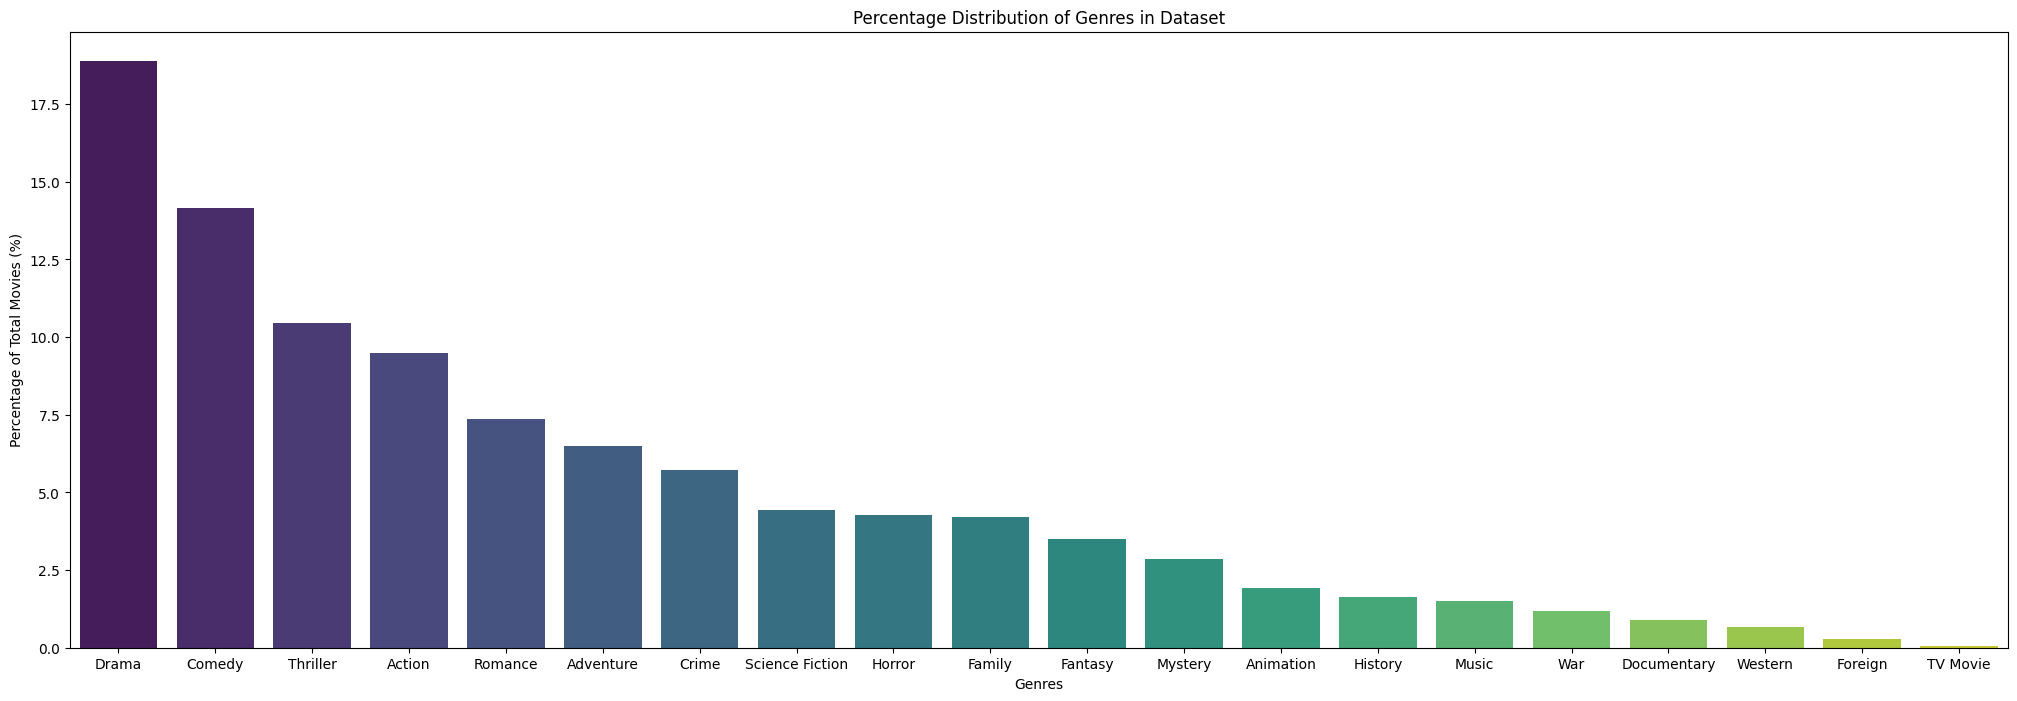

In [36]:
# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()

temp_df['genres'] = temp_df['genres'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
).apply(lambda x: [str(i) for i in x] if isinstance(x, list) else [])

# Explode the genres column to get one row per genre per movie
temp_df = temp_df.explode('genres').dropna(subset=['genres'])

# Calculate the percentage of each genre
genre_counts = temp_df['genres'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(25, 8))
sns.barplot(y=genre_counts.values, x=genre_counts.index, hue=genre_counts.index, palette='viridis', dodge=False, legend=False)
plt.title("Percentage Distribution of Genres in Dataset")
plt.ylabel("Percentage of Total Movies (%)")
plt.xlabel("Genres")
plt.show()

The bar chart shows the distribution of different movie genres within a dataset. Drama is the most common genre, accounting for over 25% of the movies. Comedy and Thriller follow closely behind. Genres like Western, Foreign, and TV Movie are the least represented.

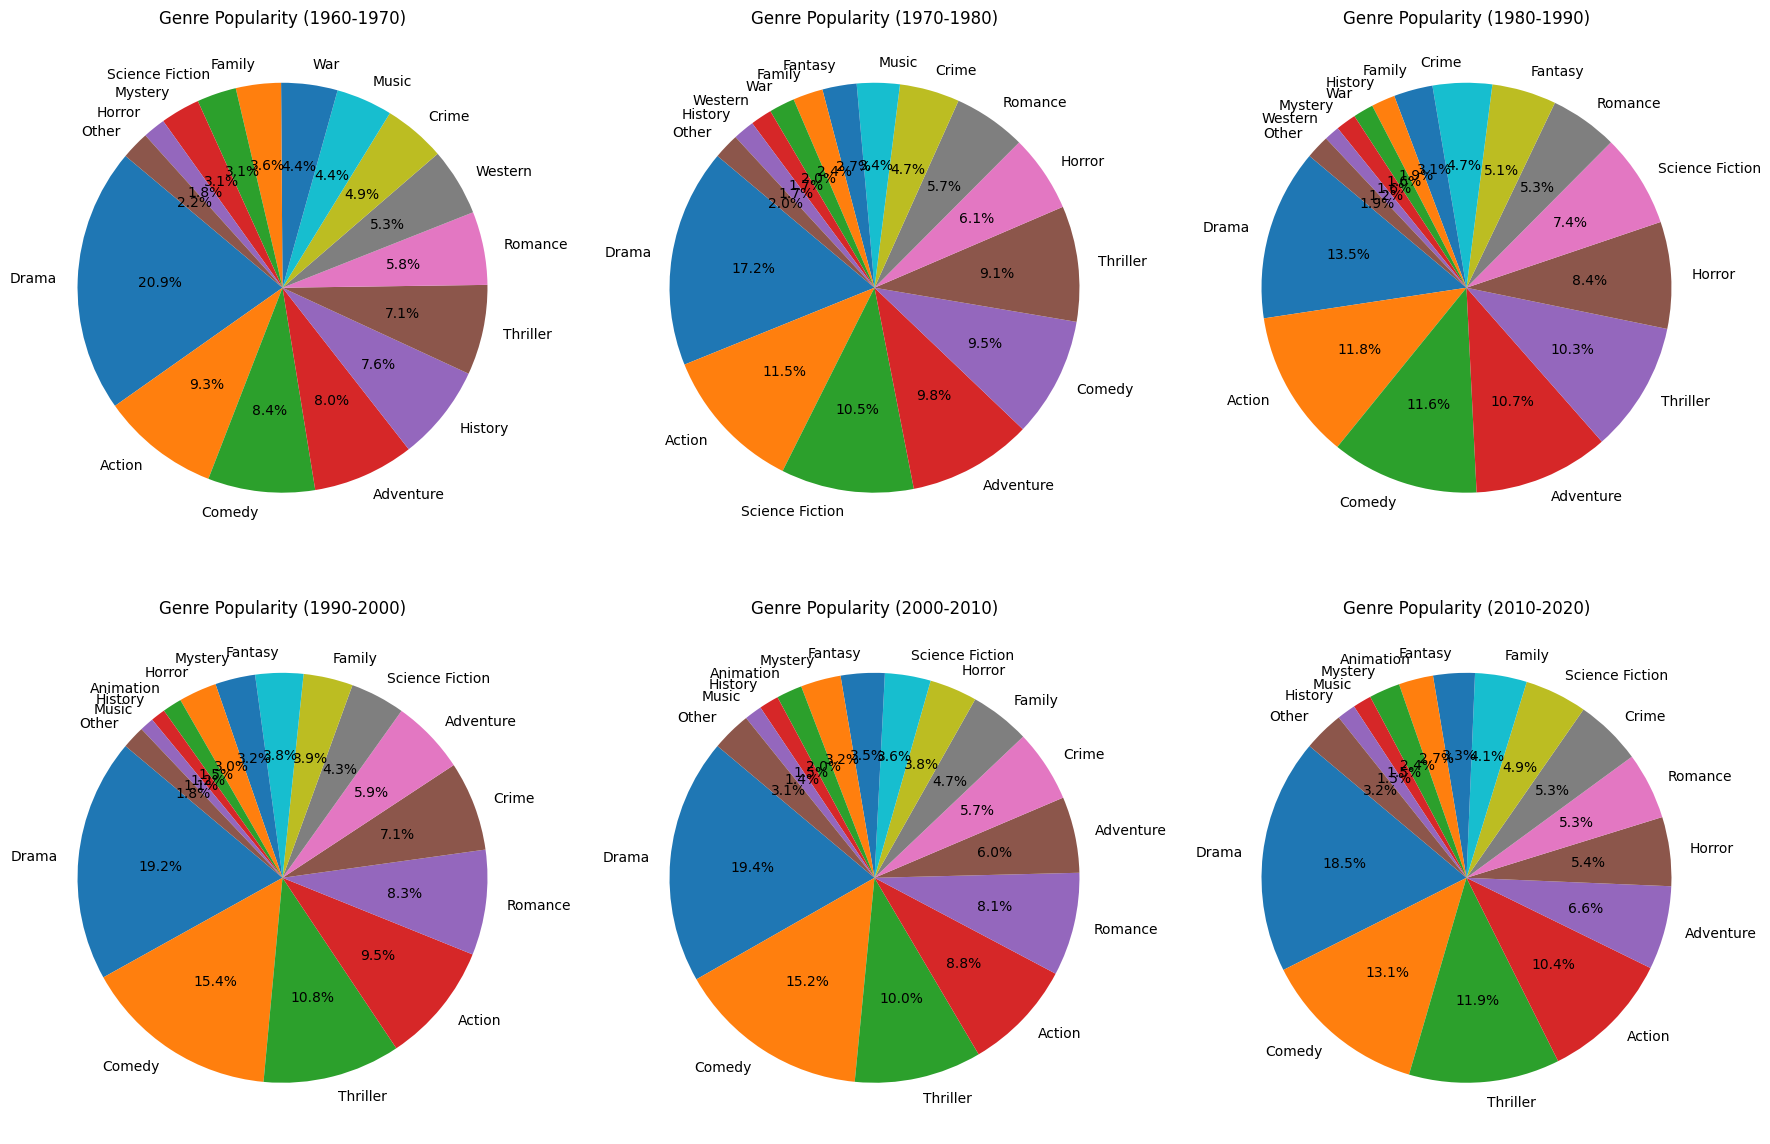

In [37]:
# Convert release_date to datetime and extract year
movies_credits['release_date'] = pd.to_datetime(movies_credits['release_date'], errors='coerce')
movies_credits['year'] = movies_credits['release_date'].dt.year

# Define year bins and labels
year_bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']

# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()
temp_df['period'] = pd.cut(temp_df['year'], bins=year_bins, labels=labels)

# Explode genres and filter out rows with missing period or genres
temp_df = temp_df.explode('genres').dropna(subset=['period', 'genres'])

# Group by period and genres, then unstack and fill missing values with 0
genre_popularity = temp_df.groupby(['period', 'genres'], observed=False).size().unstack(fill_value=0)

# Set up the pie charts
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) 
axes = axes.flatten() 

for i, period in enumerate(labels):
    sorted_genre_counts = genre_popularity.loc[period].sort_values(ascending=False)
    
    # Get top 15 genres and sum others as "Other"
    if len(sorted_genre_counts) > 15:
        top_15_genres = sorted_genre_counts[:15]
        other_genres = sorted_genre_counts[15:].sum()
        top_15_genres['Other'] = other_genres
    else:
        top_15_genres = sorted_genre_counts

    axes[i].pie(
        top_15_genres,
        labels=top_15_genres.index,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f"Genre Popularity ({period})")

plt.tight_layout()
plt.show()


#### A quick look at movie genre trends over the decades:

1. Drama is King: Drama’s been the top genre in every decade, consistently making up around 20% of movies.

2. Action and Adventure Grow: Action and Adventure see steady growth, especially from the 1980s onward, likely driven by blockbuster hits.

3. Sci-Fi's Late Arrival: Sci-Fi starts small but takes off in the 80s and beyond, as audiences warm up to tech-driven stories.

4. Comedy Stays Steady: Comedy’s a crowd-pleaser across all years, holding around 10-15% every decade.

5. Thriller & Horror Stay Niche: While Horror and Thriller have their fans, they generally hold smaller shares than big genres like Drama or Comedy.

6. Fantasy and Family Rise: In the 2000s and 2010s, Fantasy and Family films gain traction, likely influenced by popular franchises.

Overall, some genres like Drama and Comedy are timeless, while Sci-Fi, Fantasy, and Family have gained popularity with time and changing tastes.

### What kinds of properties are associated with movies that have high revenues?

#### 1. Genre and Revenue

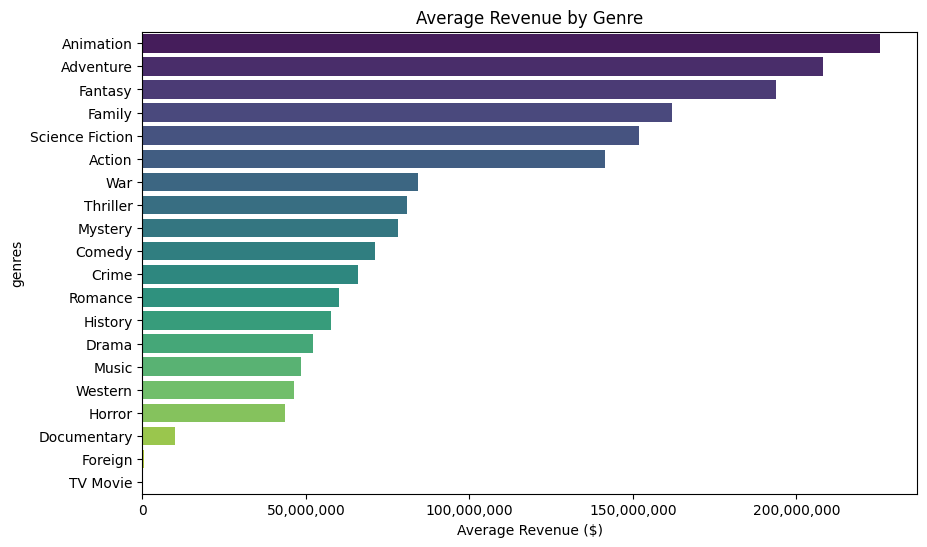

In [38]:
# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()

# Calculate average revenue by genre
temp_df = temp_df.explode('genres').dropna(subset=['revenue', 'genres'])
genre_revenue = temp_df.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# Plotting the average revenue by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, hue=genre_revenue.index, dodge=False, palette='viridis', legend=False)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Average Revenue by Genre")
plt.xlabel("Average Revenue ($)")
plt.show()


Animation and Adventure movies are the clear winners, consistently bringing in the most dough. Genres like Fantasy, Family, and Science Fiction follow closely behind.

Things get a bit less profitable after that. Genres like War, Thriller, and Comedy sit in the middle of the pack. And at the bottom, we've got genres like Documentary, Foreign, and TV Movies, which struggle to reach the same heights as the top earners.

#### 2. Budget vs. Revenue

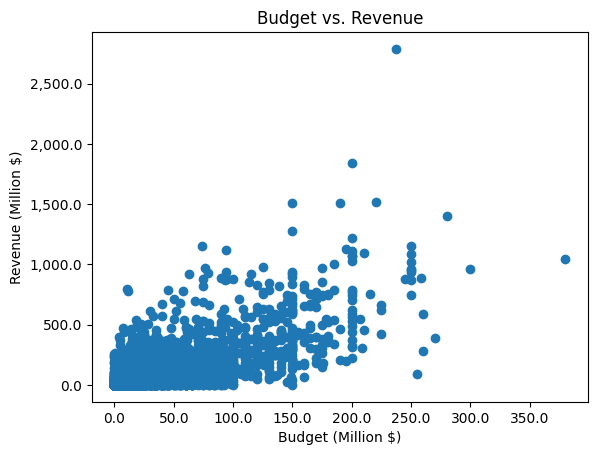

In [39]:
# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()

plt.scatter(temp_df['budget'], temp_df['revenue'])
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (Million $)')
plt.ylabel('Revenue (Million $)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)/1000000:,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)/1000000:,}'))
plt.show()

The scatter plot illustrates the relationship between a movie's budget and its revenue. Generally, there's a positive correlation, meaning higher budgets tend to be associated with higher revenues. However, the scatter is quite spread out, indicating that while budget is a factor, it's not the sole determinant of a movie's success.

#### 3. Popularity vs. revenue

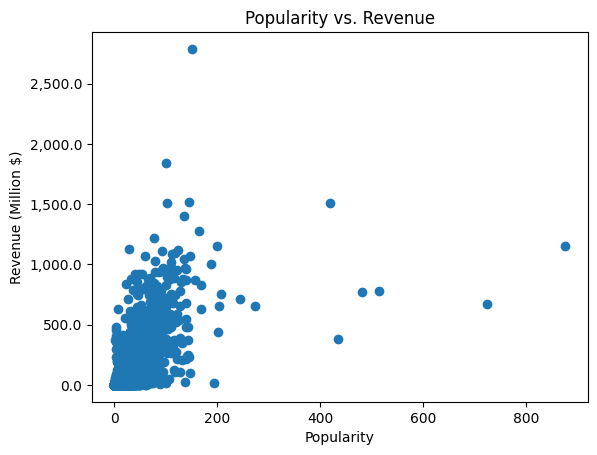

In [40]:
# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()

plt.scatter(temp_df['popularity'], temp_df['revenue'])
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (Million $)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)/1000000:,}'))
plt.show()


The scatter plot illustrates the relationship between a movie's popularity and its revenue. While there is a general trend suggesting that more popular movies tend to generate higher revenue, the correlation is not perfectly linear. Many movies with high popularity have moderate revenue, and some movies with relatively low popularity have surprisingly high revenue.

#### 4. Keyword vs. revenue

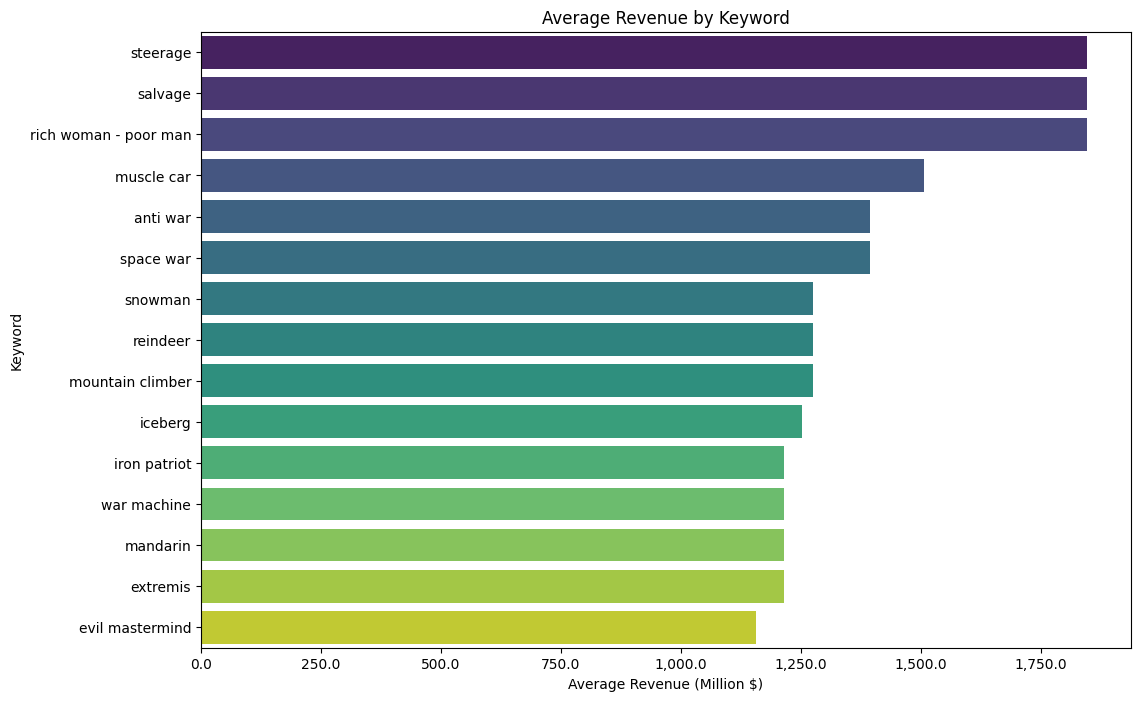

In [41]:
# Create a temporary DataFrame with period and genres for analysis
temp_df = movies_credits.copy()

temp_df = temp_df.explode('keywords').dropna(subset=['revenue', 'keywords'])

# Calculate average revenue per keyword
keyword_revenue = temp_df.groupby('keywords')['revenue'].mean().sort_values(ascending=False)

# Select top 15 keywords by revenue
top_keywords = keyword_revenue.head(15)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_keywords.values, y=top_keywords.index, hue=top_keywords.index, palette='viridis', dodge=False, legend=False)

# Formatting
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)/1000000:,}'))
plt.title("Average Revenue by Keyword")
plt.xlabel("Average Revenue (Million $)")
plt.ylabel("Keyword")
plt.show()

The chart shows that movies with keywords like "steerage", "salvage", and "rich woman - poor man" tend to make the most money, on average. Keywords like "muscle car" and "space war" are also pretty good. This suggests that certain themes and storylines are more commercially appealing than others.

<a id='cons'></a>
## Conclusions

Let us revisit the questions and summarize our conclusions.

### Q1:Which genres are most popular from year to year?

Based on our analysis, we can conclude that:

- Drama consistently ranks as the most popular genre across all years.
- Comedy and Thriller maintain a strong presence throughout the years.
- Action and Adventure have seen increasing popularity in recent years.
- Genres like Western, Documentary, and TV Movie remain less prevalent.

### Q2: What kinds of properties are associated with movies that have high revenues?

Our analysis suggests that the following properties are associated with high-revenue movies:

- Genre: Genres like Action, Adventure, Science Fiction, and Fantasy tend to have higher average revenues.
- Budget: Higher budget movies often correlate with higher revenue, although there are exceptions.
- Popularity: More popular movies generally generate higher revenue, but this is not a guaranteed relationship.
- Keywords: Keywords like "steerage," "salvage," and "rich woman - poor man" are associated with higher-revenue movies.

### Limitations of Dataset

- The revenue and budget were not denominated in currency, so it’s unsure whether they are in USD, or another currency.


In [42]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

zsh:1: command not found: python
